# Linear Models

NIVEDITA MANDAL 18SCSE1010729

Ordinary Least Squares

In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

Ridge regression and classification

In [3]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.coef_

reg.intercept_


0.1363636363636364

Setting the regularization parameter: generalized Cross-Validation

In [4]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


reg.alpha_

0.01

Lasso

In [5]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])

array([0.8])

LARS Lasso

In [6]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.coef_

array([0.71715729, 0.        ])

Bayesian Ridge Regression

In [7]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [8]:
reg.predict([[1, 0.]])

array([0.50000013])

The coefficients w of the model can be accessed:

In [23]:
reg.coef_

array([1., 2.])

Usage

Polynomial regression: extending linear models with basis functions

In [28]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X



poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

 A single object representing a simple polynomial regression can be created and used as follows:

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [19]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
y

X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X




clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)

In [20]:
clf.predict(X)

clf.score(X, y)

1.0

sklearn.linear_model.LinearRegression

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

array([16.])

Linear Regression Example
This example uses the only the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique.

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


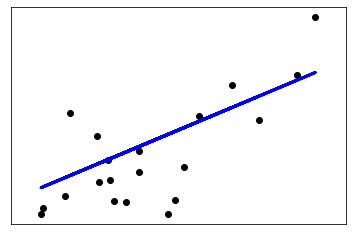

In [17]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Change the feature in the example and discuss the output

Automatically created module for IPython interactive environment
Coefficients: 
 [709.19471785]
Mean squared error: 4058.41
Coefficient of determination: 0.16


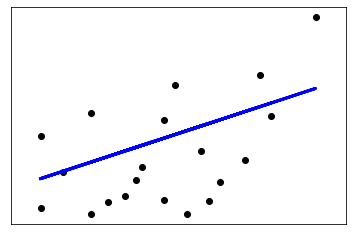

In [18]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 3]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Increase the feature size to 2 in the example and discuss the output

Automatically created module for IPython interactive environment
Coefficients: 
 [352.82770178]
Mean squared error: 5608.70
Coefficient of determination: -0.16


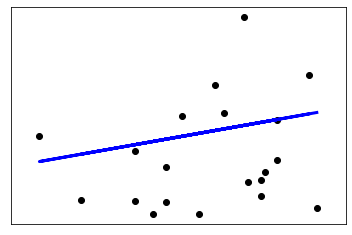

In [1]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 4]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()